Create a data set for three classes and train them for classification.  We want to have two classes with high accuracy and one with low accuracy. So, we will select samples for one class from a population with high variance.

In [1]:
# import libraries
import numpy as np
from numpy import random

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Create features
import random

# features for the 1st class
x0 = np.random.normal(5, 3, size=(100, 10))

# Select x1 from a population of 500 samples with high variance
# Create a population
population = np.random.normal(15, 14, size=(500, 10)).tolist()   # set high variance to get low accuracy
print("shape of population", np.shape(population))
# Select 60 samples from the population randomly
x1 = np.array([population.pop(random.randint(0, len(population)-1)) for i in range(60)])

# features for the 3rd class
x2 = np.random.normal(25, 3, size=(100, 10))

print(' x0 {}: \n  {} \n ... \n x1 {}: \n  {} \n ... \n x2 {}: \n  {} \n ...'.format(x0.shape, x0[:3], x1.shape, x1[:3], x2.shape, x2[:3]))
print("shape of population", np.shape(population)) # check the current population

shape of population (500, 10)
 x0 (100, 10): 
  [[ 8.41726973  2.98252606  6.1984297   2.07471326  1.69771833  6.14455376
   5.51578766  1.09238304  2.33462909  5.03102582]
 [ 9.09834472  2.23872661  7.66332535  5.24862635  3.33125838  3.94802139
   7.64779554  5.09040574  8.75703637  2.18961082]
 [ 1.97679399  5.49250982 11.08203965  2.09697423  6.92231288  0.9122232
   4.82871421  8.79039561  5.63199236  4.88838112]] 
 ... 
 x1 (60, 10): 
  [[  6.66566421  12.05113329  -2.09726908   2.38519845   5.83247561
   19.03738668  33.79374313  34.06685941   9.73042407   6.77453357]
 [  7.86753605  37.43809553  15.04149217  41.56452127  26.03890684
   -0.14098779   9.76694119 -13.35263324  14.75317651  51.54146923]
 [ 14.88696879  36.13290804   2.2233465   -7.50641914  14.96521976
   -3.8819721   23.94361655  34.49867155  12.4177314   17.92700186]] 
 ... 
 x2 (100, 10): 
  [[26.09949337 24.78669251 30.255491   26.77741968 26.51244762 25.10713115
  25.06107595 26.81203565 21.38855226 23.5802831

In [3]:
# Join features
X = np.concatenate((x0, x1, x2), axis=0)
print(" X[1]: \n  {} \n X[100]: \n  {} \n X[200]: \n  {} \n".format(X[1], X[100], X[200]))
X.shape

 X[1]: 
  [9.09834472 2.23872661 7.66332535 5.24862635 3.33125838 3.94802139
 7.64779554 5.09040574 8.75703637 2.18961082] 
 X[100]: 
  [ 6.66566421 12.05113329 -2.09726908  2.38519845  5.83247561 19.03738668
 33.79374313 34.06685941  9.73042407  6.77453357] 
 X[200]: 
  [28.50293297 27.5705933  21.73015841 21.37910063 22.60087559 24.30315997
 23.64663723 25.75720197 25.30023742 24.48467782] 



(260, 10)

In [4]:
# Create labels
y0 = np.zeros(100, dtype=int)
y1 = np.ones(60, dtype=int)
#y2 = y1 * 2
y2 = np.full(100, 2, dtype=int)
y = np.concatenate((y0, y1, y2))
y.shape

(260,)

In [5]:
# Split the data
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [6]:
# Create and train a Multi-layer Perceptron classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = MLPClassifier(random_state=1, max_iter=300, warm_start=True).fit(X_train, y_train)

# check the results of training
print(clf.predict_proba(X_test[:1]))
print(clf.predict(X_test[:5, :]))
print(clf.score(X_test, y_test))

y_pred = clf.predict(X_test)

# Check other metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[9.85278012e-01 1.44393604e-02 2.82627147e-04]]
[0 0 1 2 1]
0.9230769230769231
[[25  0  0]
 [ 2 10  3]
 [ 0  0 25]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.67      0.80        15
           2       0.89      1.00      0.94        25

    accuracy                           0.92        65
   macro avg       0.94      0.89      0.90        65
weighted avg       0.93      0.92      0.92        65



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [7]:
len(population)  # see if we have enough samples remained

440

In [8]:
# Get 50 more samples from the population
X1 = np.array([population.pop(random.randint(0, len(population)-1)) for i in range(50)])
print(X1.shape)

# Join the new features with two samples from other class
X1 = np.concatenate((x0[:2], X1, x2[:2]), axis=0)
print(X1[:3])

(50, 10)
[[  8.41726973   2.98252606   6.1984297    2.07471326   1.69771833
    6.14455376   5.51578766   1.09238304   2.33462909   5.03102582]
 [  9.09834472   2.23872661   7.66332535   5.24862635   3.33125838
    3.94802139   7.64779554   5.09040574   8.75703637   2.18961082]
 [ 25.08522259   7.36810576  13.95174957 -12.09217026  10.86283912
   21.34760417  13.85234234  -9.65851451  34.15742802  13.7519074 ]]


In [9]:
# Prepare relevant labels for the new features
Y1 = np.ones(50, dtype=int)
Y1 = np.concatenate((y0[:2], Y1, y2[:2]), axis=0)
Y1

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2])

In [10]:
# Split the data
X1 = StandardScaler().fit_transform(X1)    
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, stratify=Y1, random_state=1)

In [11]:
# Retrain the model with new samples

import statistics

# scores of the model before retraining
prev_score = clf.score(X_test, y_test)
Scores = []

# call partial_fit method on new samples iteratively
while True:
  clf.partial_fit(X1_train, y1_train)
  Score = clf.score(X_test, y_test)
  # allow small decreases in the score
  if Score >= 0.99*prev_score:
    Scores.append(Score)
    prev_score = Score
  else:
    break

print("num of iterations: ", len(Scores)-1) 

# Check again the evaluation metrics
y_pred = clf.predict(X_test)

print(clf.predict_proba(X_test[:1]))
print(clf.predict(X_test[:5, :]))
print(clf.score(X_test, y_test))
print("")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

num of iterations:  11
[[9.55058352e-01 4.43931908e-02 5.48457279e-04]]
[0 1 1 1 1]
0.9692307692307692

[[25  0  0]
 [ 1 14  0]
 [ 0  1 24]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.93      0.93      0.93        15
           2       1.00      0.96      0.98        25

    accuracy                           0.97        65
   macro avg       0.96      0.96      0.96        65
weighted avg       0.97      0.97      0.97        65



iterations:  11


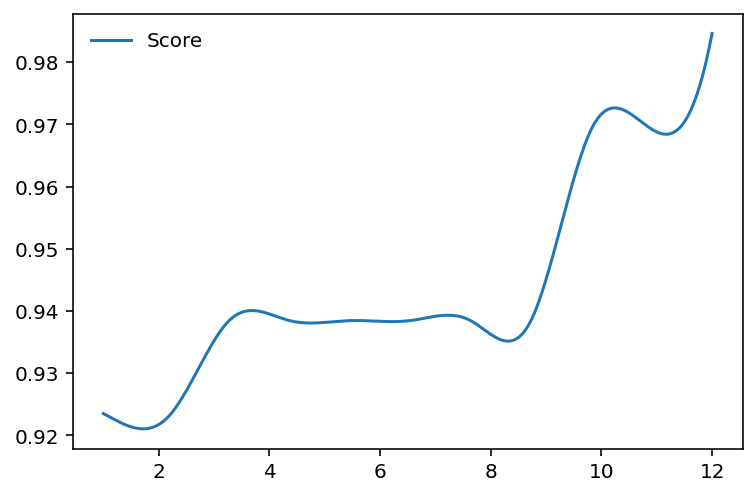

In [12]:
# Visualize accuracy and number of iterations

import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

iterations = len(Scores) -1
print("iterations: ",iterations)

x = np.linspace(0, iterations+1, iterations+1)

x_new = np.linspace(1, iterations+1, 1000)
a_BSpline = interpolate.make_interp_spline(x, Scores)
y_new = a_BSpline(x_new)

plt.plot(x_new, y_new, label='Score')
plt.legend(frameon=False)